# DATA PRE-PROCESSING - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, I will evaluate and define the most appropriate **pre-processing operations** (in the next notebook), also in relation to the thesis work of *Nastaran Ahmadi Bonakdare* and the procedures described in the article “*Early detection and diagnosis of cancer with interpretable machine learning to uncover cancer-specific DNA methylation patterns*” (Izzy Newsham et al., MRC Cancer Unit, University of Cambridge).

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation
import warnings

### Import dataset 

In [2]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

# Delete the first column relating to the CpG index
raw_dataset.set_index('ID_REF', inplace=True)

# I transpose the dataset so that each row represents a sample and each column corresponds to a CpG site (feature)
raw_dataset = raw_dataset.T

In [8]:
prova = raw_dataset.copy()

## Data Pre-Processing
### Step 1 — Sample Grouping and Label Assignment

As a first preprocessing step, the samples were grouped into three biological categories based on the classification reported on the GEO portal **[1]**, as referenced in Bonakdare’s work. Specifically, the dataset includes 407 samples in total, which were assigned to one of the following groups:

* **0** = Normal
* **1** = Adjacent-normal
* **2** = Tumor

All samples were retained, including those characterized as BRCA1-normal and BRCA1-tumor, which were incorporated into the respective normal and tumor groups for this initial stage. This labeling provides a consistent structure for downstream preprocessing and analysis.

**Open consideration — BRCA1-specific samples:**
A question arises regarding the treatment of BRCA1-positive samples currently embedded within the normal and tumor classes. Given the relatively limited sample size, is it more appropriate to retain these cases within their broader biological groups (as done here), remove them to avoid potential confounding, or define them as separate categories for downstream stratification? For the moment, they have been included in the main classes, with the option of excluding or reclassifying them at a later stage without affecting the current workflow.

- `normal_brca1_samples = \['GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560', 'GSM1712650', 'GSM1712724']`
- `cancer_brca1_samples = \['GSM1712411', 'GSM1712427', 'GSM1712636']`

If batch correction becomes necessary at a later stage, I can retrieve technical batch information from the GEO sample pages (GSM entries). Each GSM record typically includes a ‘Sentrix ID’ or ‘methylation barcode’, which identifies the slide or array on which the sample was processed. These slide-level identifiers can be used to group samples into technical batches. Including such batch covariates in downstream analysis (e.g., during normalization or differential methylation testing) can help remove non-biological variation introduced by processing differences across arrays or time. This step would only be required if exploratory analyses later reveal clustering, bias, or unwanted variability that is not explained by biological groups alone.

In [3]:
# Each sample is assigned a status: normal, adjacent, tumour

# 0 - Normal
normal_samples = [
    'GSM1712369', 'GSM1712385', 'GSM1712398', 'GSM1712412', 'GSM1712419', 'GSM1712423',
    'GSM1712435', 'GSM1712439', 'GSM1712440', 'GSM1712449', 'GSM1712464', 'GSM1712472',
    'GSM1712489', 'GSM1712490', 'GSM1712504', 'GSM1712535', 'GSM1712541', 'GSM1712551',
    'GSM1712565', 'GSM1712566', 'GSM1712574', 'GSM1712578', 'GSM1712583', 'GSM1712598',
    'GSM1712609', 'GSM1712615', 'GSM1712620', 'GSM1712625', 'GSM1712633', 'GSM1712648',
    'GSM1712649', 'GSM1712660', 'GSM1712661', 'GSM1712664', 'GSM1712678', 'GSM1712682',
    'GSM1712683', 'GSM1712693', 'GSM1712700', 'GSM1712713', 'GSM1712721', 'GSM1712723',
    'GSM1712733', 'GSM1712745', 'GSM1712755', 'GSM1712763', 'GSM1712772', 'GSM1712776', 
    'GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560',
    'GSM1712650', 'GSM1712724'
]

# 1 - Adjacent-Normal
adjacent_normal_samples = [
    'GSM1712368', 'GSM1712372', 'GSM1712383', 'GSM1712390', 'GSM1712405', 'GSM1712436',
    'GSM1712450', 'GSM1712457', 'GSM1712465', 'GSM1712466', 'GSM1712473', 'GSM1712475',
    'GSM1712487', 'GSM1712500', 'GSM1712503', 'GSM1712510', 'GSM1712511', 'GSM1712520',
    'GSM1712523', 'GSM1712528', 'GSM1712538', 'GSM1712548', 'GSM1712549', 'GSM1712558',
    'GSM1712572', 'GSM1712581', 'GSM1712595', 'GSM1712597', 'GSM1712606', 'GSM1712610',
    'GSM1712611', 'GSM1712612', 'GSM1712613', 'GSM1712614', 'GSM1712616', 'GSM1712632',
    'GSM1712642', 'GSM1712644', 'GSM1712672', 'GSM1712687', 'GSM1712701', 'GSM1712706',
    'GSM1712708', 'GSM1712727', 'GSM1712737', 'GSM1712739', 'GSM1712743', 'GSM1712752',
    'GSM1712777'
]

# 2 - Breast Cancer
breast_cancer_samples = [
    'GSM1712367', 'GSM1712370', 'GSM1712371', 'GSM1712373', 'GSM1712374', 'GSM1712375',
    'GSM1712376', 'GSM1712377', 'GSM1712379', 'GSM1712380', 'GSM1712382', 'GSM1712381',
    'GSM1712384', 'GSM1712386', 'GSM1712387', 'GSM1712388', 'GSM1712389', 'GSM1712391',
    'GSM1712393', 'GSM1712394', 'GSM1712395', 'GSM1712396', 'GSM1712397', 'GSM1712399',
    'GSM1712400', 'GSM1712401', 'GSM1712402', 'GSM1712403', 'GSM1712404', 'GSM1712406',
    'GSM1712407', 'GSM1712408', 'GSM1712409', 'GSM1712410', 'GSM1712413', 'GSM1712414',
    'GSM1712415', 'GSM1712416', 'GSM1712417', 'GSM1712418', 'GSM1712421', 'GSM1712422',
    'GSM1712424', 'GSM1712425', 'GSM1712426', 'GSM1712428', 'GSM1712429', 'GSM1712430',
    'GSM1712431', 'GSM1712432', 'GSM1712433', 'GSM1712434', 'GSM1712437', 'GSM1712438',
    'GSM1712441', 'GSM1712443', 'GSM1712444', 'GSM1712445', 'GSM1712446', 'GSM1712447',
    'GSM1712448', 'GSM1712451', 'GSM1712452', 'GSM1712453', 'GSM1712454', 'GSM1712455',
    'GSM1712456', 'GSM1712458', 'GSM1712459', 'GSM1712460', 'GSM1712461', 'GSM1712462',
    'GSM1712463', 'GSM1712467', 'GSM1712468', 'GSM1712469', 'GSM1712470', 'GSM1712471',
    'GSM1712474', 'GSM1712477', 'GSM1712478', 'GSM1712479', 'GSM1712480', 'GSM1712482',
    'GSM1712483', 'GSM1712484', 'GSM1712485', 'GSM1712486', 'GSM1712488', 'GSM1712491',
    'GSM1712492', 'GSM1712493', 'GSM1712494', 'GSM1712495', 'GSM1712496', 'GSM1712497',
    'GSM1712498', 'GSM1712499', 'GSM1712501', 'GSM1712502', 'GSM1712505', 'GSM1712506',
    'GSM1712507', 'GSM1712508', 'GSM1712509', 'GSM1712481', 'GSM1712512', 'GSM1712513',
    'GSM1712514', 'GSM1712515', 'GSM1712516', 'GSM1712517', 'GSM1712518', 'GSM1712519',
    'GSM1712521', 'GSM1712522', 'GSM1712524', 'GSM1712525', 'GSM1712526', 'GSM1712527',
    'GSM1712529', 'GSM1712530', 'GSM1712531', 'GSM1712532', 'GSM1712533', 'GSM1712534',
    'GSM1712536', 'GSM1712537', 'GSM1712539', 'GSM1712540', 'GSM1712542', 'GSM1712543',
    'GSM1712544', 'GSM1712545', 'GSM1712546', 'GSM1712547', 'GSM1712550', 'GSM1712552',
    'GSM1712553', 'GSM1712554', 'GSM1712555', 'GSM1712556', 'GSM1712557', 'GSM1712559',
    'GSM1712561', 'GSM1712562', 'GSM1712563', 'GSM1712564', 'GSM1712567', 'GSM1712568',
    'GSM1712569', 'GSM1712570', 'GSM1712571', 'GSM1712573', 'GSM1712575', 'GSM1712576',
    'GSM1712577', 'GSM1712579', 'GSM1712580', 'GSM1712582', 'GSM1712584', 'GSM1712585',
    'GSM1712586', 'GSM1712587', 'GSM1712588', 'GSM1712589', 'GSM1712590', 'GSM1712591',
    'GSM1712592', 'GSM1712593', 'GSM1712594', 'GSM1712596', 'GSM1712599', 'GSM1712600',
    'GSM1712601', 'GSM1712602', 'GSM1712603', 'GSM1712604', 'GSM1712605', 'GSM1712607',
    'GSM1712608', 'GSM1712617', 'GSM1712618', 'GSM1712619', 'GSM1712621', 'GSM1712622',
    'GSM1712623', 'GSM1712624', 'GSM1712626', 'GSM1712627', 'GSM1712628', 'GSM1712629',
    'GSM1712630', 'GSM1712631', 'GSM1712634', 'GSM1712635', 'GSM1712637', 'GSM1712638',
    'GSM1712639', 'GSM1712640', 'GSM1712641', 'GSM1712643', 'GSM1712645', 'GSM1712646',
    'GSM1712647', 'GSM1712651', 'GSM1712652', 'GSM1712653', 'GSM1712654', 'GSM1712655',
    'GSM1712656', 'GSM1712657', 'GSM1712658', 'GSM1712659', 'GSM1712662', 'GSM1712663',
    'GSM1712665', 'GSM1712666', 'GSM1712667', 'GSM1712668', 'GSM1712669', 'GSM1712670',
    'GSM1712671', 'GSM1712673', 'GSM1712674', 'GSM1712675', 'GSM1712676', 'GSM1712677',
    'GSM1712679', 'GSM1712680', 'GSM1712681', 'GSM1712684', 'GSM1712685', 'GSM1712686',
    'GSM1712688', 'GSM1712689', 'GSM1712690', 'GSM1712691', 'GSM1712692', 'GSM1712694',
    'GSM1712695', 'GSM1712696', 'GSM1712697', 'GSM1712698', 'GSM1712699', 'GSM1712702',
    'GSM1712703', 'GSM1712704', 'GSM1712705', 'GSM1712707', 'GSM1712709', 'GSM1712710',
    'GSM1712711', 'GSM1712712', 'GSM1712714', 'GSM1712715', 'GSM1712716', 'GSM1712717',
    'GSM1712718', 'GSM1712719', 'GSM1712720', 'GSM1712722', 'GSM1712725', 'GSM1712726',
    'GSM1712728', 'GSM1712729', 'GSM1712730', 'GSM1712731', 'GSM1712732', 'GSM1712734',
    'GSM1712735', 'GSM1712736', 'GSM1712738', 'GSM1712740', 'GSM1712741', 'GSM1712742',
    'GSM1712744', 'GSM1712746', 'GSM1712747', 'GSM1712748', 'GSM1712749', 'GSM1712750',
    'GSM1712751', 'GSM1712753', 'GSM1712754', 'GSM1712756', 'GSM1712758', 'GSM1712760',
    'GSM1712766', 'GSM1712767', 'GSM1712768', 'GSM1712769', 'GSM1712770', 'GSM1712771',
    'GSM1712773', 'GSM1712774', 'GSM1712775', 'GSM1712778', 'GSM1712779', 'GSM1712411', 
    'GSM1712427', 'GSM1712636'
]

In [4]:
# Create a lookup dictionary for faster and cleaner mapping
label_map = {
    **{sample: 0 for sample in normal_samples},
    **{sample: 1 for sample in adjacent_normal_samples},
    **{sample: 2 for sample in breast_cancer_samples}    
}

# Assign labels using the dictionary
raw_dataset['label'] = raw_dataset.index.map(label_map)

# Remove samples without an assigned label -> TODO only if I choose to eliminate normal_brca1_samples and cancer_brca1_samples
# data = data.dropna(subset=['label'])

# Convert label column to integer
raw_dataset['label'] = raw_dataset['label'].astype(int)

print(f"Dataset shape: {raw_dataset.shape}" )

# Preview the final dataset
raw_dataset.head()

Dataset shape: (407, 485513)


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R,label
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424,2
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961,1
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543,0
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842,2
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693,2


### Step 2 - ARRIATA QUA

DEVI INIZIARE A DIRE COSA DEVI FARE IN QUESTO STEP E PERCHè

LA PRIMA CELLA è SBAGLIATA PERCHè CERCA OUTLIERS NEI CAMPIONI, MA IO LI DEVO CERCARE NELLE CPG


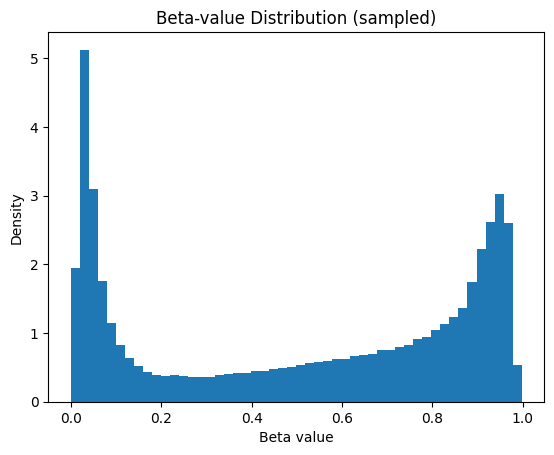

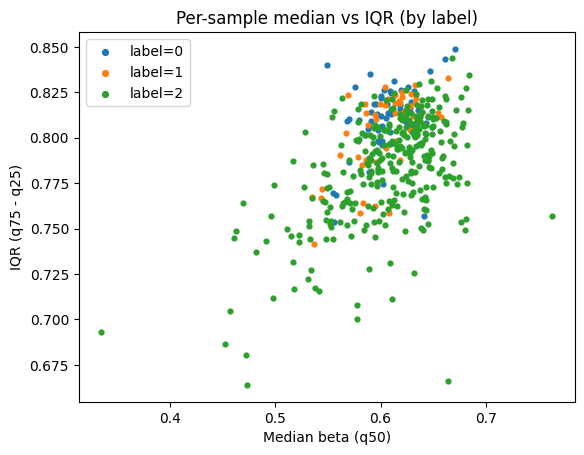

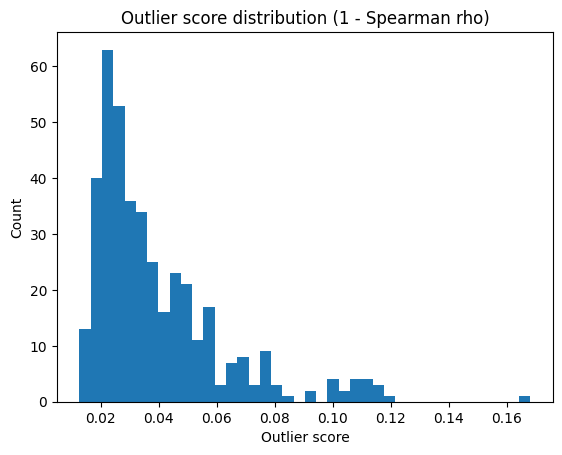

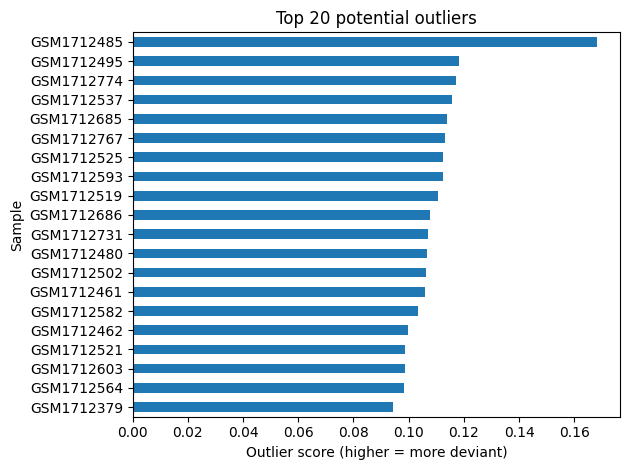


Top 10 potential outliers (higher distance = more deviant):
GSM1712485    0.168152
GSM1712495    0.118154
GSM1712774    0.117020
GSM1712537    0.115727
GSM1712685    0.113906
GSM1712767    0.113191
GSM1712525    0.112599
GSM1712593    0.112406
GSM1712519    0.110577
GSM1712686    0.107630
dtype: float64


In [6]:
# Split features and labels
LABEL_COL = 'label'
assert LABEL_COL in raw_dataset.columns, f"'{LABEL_COL}' column not found."

data = raw_dataset.copy()
X = data.drop(columns=[LABEL_COL])
y = data[LABEL_COL].astype(int)


# LIGHT DIAGNOSTICS
# (a) Per-sample distribution quantiles
quantiles = X.quantile([0.01, 0.25, 0.50, 0.75, 0.99], axis=1).T
quantiles.columns = ['q01', 'q25', 'q50', 'q75', 'q99']
iqr = quantiles['q75'] - quantiles['q25']

# (b) Outlier score via rank-based (Spearman-like) distance
rng = np.random.default_rng(42)
subset_size = min(50000, X.shape[1])  # cap to limit memory/time
subset_cols = rng.choice(X.columns, size=subset_size, replace=False)
Xsub = X[subset_cols]

ref = Xsub.median(axis=0)
ranked = Xsub.rank(axis=1, method='average')
ref_rank = ref.rank(method='average')

ranked_centered = ranked.sub(ranked.mean(axis=1), axis=0)
ref_centered = ref_rank - ref_rank.mean()

num = (ranked_centered * ref_centered).sum(axis=1)
den = np.sqrt((ranked_centered**2).sum(axis=1)) * np.sqrt((ref_centered**2).sum())
rho = (num / den).clip(-1, 1)
outlier_score = (1 - rho).sort_values(ascending=False)

# Final QC dataset (unchanged since I did not remove anything)
data_qc = pd.concat([y.rename(LABEL_COL), X], axis=1)

# PLOTS
# (a) Beta-value distribution (sampled)
plt.figure()
sample_n = min(30, X.shape[0])
feature_n = min(10000, X.shape[1])
sub_samples = rng.choice(X.index, size=sample_n, replace=False)
sub_features = rng.choice(X.columns, size=feature_n, replace=False)
vals = X.loc[sub_samples, sub_features].values.ravel()
plt.hist(vals, bins=50, density=True)
plt.title("Beta-value Distribution (sampled)")
plt.xlabel("Beta value")
plt.ylabel("Density")
plt.show()

# (b) Median vs IQR per sample, color-coded by label
plt.figure()
for lbl in sorted(y.unique()):
    mask = (y == lbl)
    plt.scatter(
        quantiles.loc[mask, 'q50'],
        iqr.loc[mask],
        label=f"label={lbl}",
        s=12
    )
plt.title("Per-sample median vs IQR (by label)")
plt.xlabel("Median beta (q50)")
plt.ylabel("IQR (q75 - q25)")
plt.legend(markerscale=1.2)
plt.show()

# (c) Histogram of outlier scores
plt.figure()
plt.hist(outlier_score.values, bins=40)
plt.title("Outlier score distribution (1 - Spearman rho)")
plt.xlabel("Outlier score")
plt.ylabel("Count")
plt.show()

# (d) Top 20 potential outliers (bar chart)
top_k = min(20, outlier_score.shape[0])
plt.figure()
outlier_score.head(top_k).iloc[::-1].plot(kind='barh')
plt.title(f"Top {top_k} potential outliers")
plt.xlabel("Outlier score (higher = more deviant)")
plt.ylabel("Sample")
plt.tight_layout()
plt.show()

# Save diagnostics if needed
qc_quantiles = quantiles
qc_outlier_score = outlier_score

print("\nTop 10 potential outliers (higher distance = more deviant):")
print(outlier_score.head(10))


**Spiegazione**

* **Baseline robusta sui normali (label=0)**: per ciascun CpG, uso **mediana** e **MAD** (deviazione assoluta mediana) per stimare centro e scala robusti; questo evita che pochi punti estremi nei normali distorcano la soglia.
* **Outlier a livello di CpG × campione**: per ogni campione calcolo uno **z-score robusto** rispetto alla baseline dei normali. Un CpG è outlier se |z| ≥ **3.5** (soglia diffusa per outlier robusti).
* **Tasso di outlier per CpG nei gruppi**: per ogni CpG calcolo quanta frazione di campioni è outlier in **normal**, **adjacent**, **tumor**.
* **Prioritizzazione**: ordino i CpG per **|Δ (tumor − normal)|** dei tassi di outlier. Questo mette in cima i siti in cui l’“anomalia” è tipica del tumore ma rara nei normali.
* **Confronto Beta vs M**: replico tutto con i **M-values** (logit dei β con clipping), confronto le **Δ** con una **correlazione di Spearman** e l’overlap dei top-k. Se i risultati sono concordi, puoi mantenere β per interpretazione; se divergono, lo segnali come analisi di sensibilità e puoi motivare M per fasi inferenziali.

**Outlier-centric preprocessing and CpG prioritization (Beta and M-value scales).**
To identify methylation outliers that may act as early indicators of breast cancer, we adopted a CpG-wise, group-aware strategy. For each CpG, we estimated a robust reference distribution from the normal samples (label = 0) using the median as location and the median absolute deviation (MAD) as scale. Each sample’s value was then standardized into a robust z-score; CpG instances with |z| ≥ 3.5 were flagged as outliers (separating hyper- from hypo-methylation). We summarized outlier rates per CpG within normal, adjacent, and tumor groups, and prioritized loci by the absolute difference in outlier rates between tumor and normal (|Δ| = rate_tumor − rate_normal). This outlier-centric approach complements classical differential analyses by focusing on extreme methylation events at the single-locus level, which have been linked to disease-related dysregulation and, in some settings, to early tumorigenic processes. In parallel, we repeated the same procedure after logit-transforming β-values into M-values to assess sensitivity to scale: β is biologically interpretable as a fraction, whereas M-values are unbounded and often more suitable for statistical modeling; concordance between β- and M-based rankings increases confidence in the selected CpGs, while systematic discrepancies are explicitly reported as a robustness check. This design aligns with established recommendations that emphasize β for interpretability but favor M for inferential stability, and with prior work showing both the utility of robust preprocessing on Illumina 450K arrays and the biological relevance of methylation outlier burden across health and disease. ([BioMed Central][1])

[1]: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-587?utm_source=chatgpt.com "Comparison of Beta-value and M-value methods for ..."


=== Comparison ===
Spearman correlation of Δ (beta vs M): 0.826
Top-500 overlap: 252 / 748  (Jaccard = 0.337)


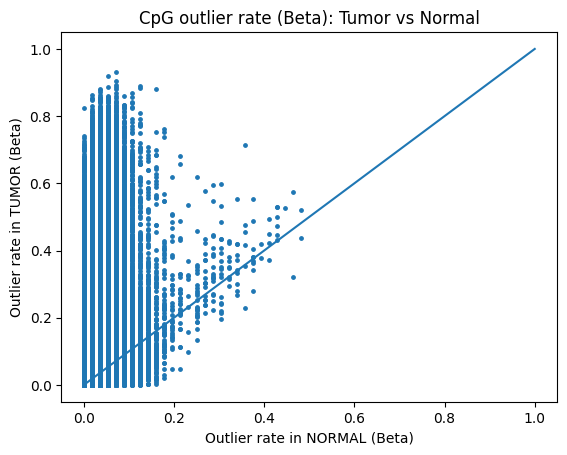

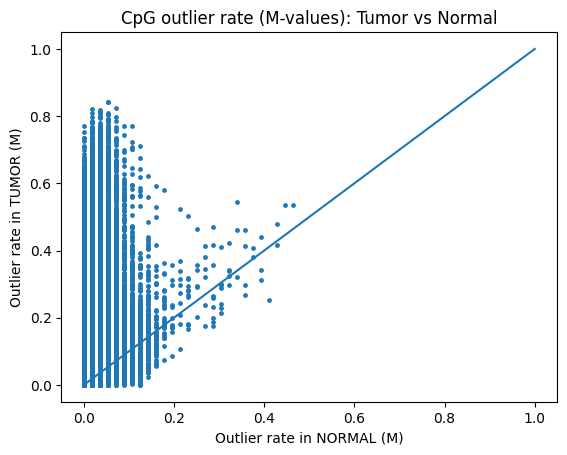

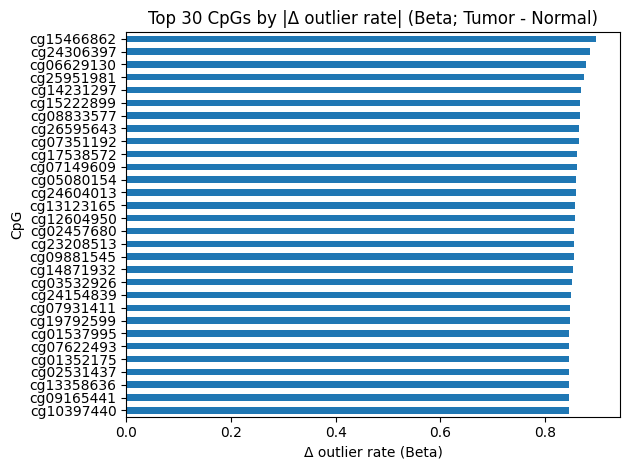

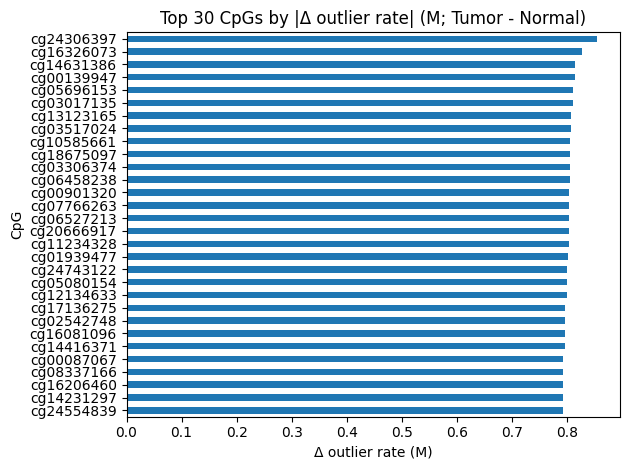

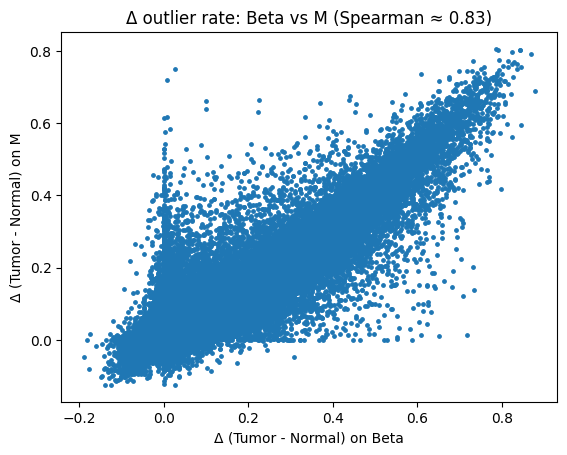


Artifacts ready:
 - cpg_outliers_beta  (per-CpG rates and Δ on Beta)
 - cpg_outliers_m     (per-CpG rates and Δ on M)
 - top_table          (Top-K export list with both deltas)


In [6]:
# ================================================================
# CpG-wise Outlier Detection (Beta first, then M-values) + Comparison
# ================================================================


# -------------------------
# Configuration
# -------------------------
LABEL_COL = 'label'
REFERENCE_LABEL = 0          # normals
OUTLIER_Z = 3.5              # robust |z| threshold (common in outlier literature)
TOP_K_DISPLAY = 30           # for plots
TOP_K_EXPORT  = 1000         # larger shortlist for downstream use
MAX_POINTS_SCATTER = 80000   # cap for scatter dots
EPS = 1e-6                   # clipping for M-values
BLOCK_COLS = 50000           # column-chunk size to limit memory (adjust if needed)

assert LABEL_COL in raw_dataset.columns, f"Missing '{LABEL_COL}' column."
data = raw_dataset.copy()
y = data[LABEL_COL].astype(int)
X_beta = data.drop(columns=[LABEL_COL]).astype(np.float32)

# Convenience masks
idx_norm = (y == 0).values
idx_adj  = (y == 1).values
idx_tum  = (y == 2).values

sample_ids = X_beta.index
cpg_ids    = X_beta.columns

# -------------------------
# Helper functions
# -------------------------
def robust_reference(X_mat: pd.DataFrame, norm_mask: np.ndarray, eps: float = 1e-6):
    """Compute CpG-wise robust center/scale on NORMAL samples (median/MAD)."""
    ref_vals = X_mat.loc[norm_mask]
    med = ref_vals.median(axis=0).astype(np.float32)
    mad = (ref_vals.sub(med, axis=1).abs().median(axis=0).astype(np.float32))
    scale = 1.4826 * mad + eps
    return med, scale

def iter_cols(df: pd.DataFrame, block_cols: int):
    cols = df.columns
    for i in range(0, len(cols), block_cols):
        yield cols[i:i + block_cols]

def outlier_masks_from_ref(X_mat: pd.DataFrame, ref_med: pd.Series, ref_scale: pd.Series,
                           zthr: float, block_cols: int):
    """Return boolean masks (hyper/hypo) without materializing full z-matrix."""
    hyper_acc, hypo_acc = [], []
    for cols in iter_cols(X_mat, block_cols):
        z = (X_mat[cols] - ref_med[cols]) / ref_scale[cols]
        hyper_acc.append(z >= zthr)
        hypo_acc.append(z <= -zthr)
    hyper = pd.concat(hyper_acc, axis=1)[X_mat.columns]
    hypo  = pd.concat(hypo_acc,  axis=1)[X_mat.columns]
    return hyper, hypo

def per_cpg_outlier_rate(mask_df: pd.DataFrame, group_mask: np.ndarray):
    denom = max(int(group_mask.sum()), 1)
    return mask_df.loc[group_mask].sum(axis=0) / denom

def summarize_from_masks(hyper_mask: pd.DataFrame, hypo_mask: pd.DataFrame):
    # per-sample counts
    hyper_counts = hyper_mask.sum(axis=1)
    hypo_counts  = hypo_mask.sum(axis=1)
    total_counts = hyper_counts + hypo_counts
    # per-CpG combined mask
    is_outlier = hyper_mask | hypo_mask
    return hyper_counts, hypo_counts, total_counts, is_outlier

def m_values_from_beta(X_beta: pd.DataFrame, eps: float = 1e-6, block_cols: int = 50000):
    """Column-wise chunked beta->M transform to control memory peak."""
    X_m = pd.DataFrame(index=X_beta.index, columns=X_beta.columns, dtype=np.float32)
    for cols in iter_cols(X_beta, block_cols):
        B = X_beta[cols].clip(eps, 1 - eps)
        M = np.log2(B / (1 - B)).astype(np.float32)
        X_m.loc[:, cols] = M.values
    return X_m

def top_by_abs_delta(delta_series: pd.Series, k: int):
    idx = delta_series.abs().sort_values(ascending=False).head(k).index
    return delta_series.loc[idx]

# -------------------------
# Part A — Beta-values
# -------------------------
ref_med_beta, ref_scale_beta = robust_reference(X_beta, idx_norm, eps=EPS)
hyper_beta, hypo_beta = outlier_masks_from_ref(
    X_beta, ref_med_beta, ref_scale_beta, zthr=OUTLIER_Z, block_cols=BLOCK_COLS
)
hyper_c_beta, hypo_c_beta, total_c_beta, is_outlier_beta = summarize_from_masks(hyper_beta, hypo_beta)

rate_norm_beta = per_cpg_outlier_rate(is_outlier_beta, idx_norm)
rate_adj_beta  = per_cpg_outlier_rate(is_outlier_beta, idx_adj)
rate_tum_beta  = per_cpg_outlier_rate(is_outlier_beta, idx_tum)
delta_beta     = rate_tum_beta - rate_norm_beta

# Shortlists
top_beta_display = top_by_abs_delta(delta_beta, TOP_K_DISPLAY)
top_beta_export  = top_by_abs_delta(delta_beta, TOP_K_EXPORT)

# -------------------------
# Part B — M-values (logit transform) + same pipeline
# -------------------------
X_m = m_values_from_beta(X_beta, eps=EPS, block_cols=BLOCK_COLS)
ref_med_m, ref_scale_m = robust_reference(X_m, idx_norm, eps=EPS)
hyper_m, hypo_m = outlier_masks_from_ref(
    X_m, ref_med_m, ref_scale_m, zthr=OUTLIER_Z, block_cols=BLOCK_COLS
)
_, _, _, is_outlier_m = summarize_from_masks(hyper_m, hypo_m)

rate_norm_m = per_cpg_outlier_rate(is_outlier_m, idx_norm)
rate_adj_m  = per_cpg_outlier_rate(is_outlier_m, idx_adj)
rate_tum_m  = per_cpg_outlier_rate(is_outlier_m, idx_tum)
delta_m     = rate_tum_m - rate_norm_m

top_m_display = top_by_abs_delta(delta_m, TOP_K_DISPLAY)
top_m_export  = top_by_abs_delta(delta_m, TOP_K_EXPORT)

# -------------------------
# Part C — Agreement / comparison
# -------------------------
# 1) Spearman correlation of deltas across all CpGs
# (align indices just in case)
delta_df = pd.DataFrame({'delta_beta': delta_beta, 'delta_m': delta_m}).dropna()
spearman_corr = delta_df['delta_beta'].rank().corr(delta_df['delta_m'].rank(), method='pearson')

# 2) Overlap of top-K lists
def overlap_stats(a_idx, b_idx):
    A, B = set(a_idx), set(b_idx)
    inter = A & B
    union = A | B
    return len(inter), len(union), (len(inter) / max(len(union), 1))

overlap_k = 500  # also compute a larger-K overlap
tb = top_by_abs_delta(delta_beta, overlap_k)
tm = top_by_abs_delta(delta_m, overlap_k)
overlap_count, union_count, jaccard = overlap_stats(tb.index, tm.index)

print("=== Comparison ===")
print(f"Spearman correlation of Δ (beta vs M): {spearman_corr:.3f}")
print(f"Top-{overlap_k} overlap: {overlap_count} / {union_count}  (Jaccard = {jaccard:.3f})")

# -------------------------
# Plots 
# -------------------------

# 1) Outlier-rate scatter: tumor vs normal, Beta
plt.figure()
pts = cpg_ids
if len(pts) > MAX_POINTS_SCATTER:
    rng = np.random.default_rng(123)
    pts = rng.choice(cpg_ids, size=MAX_POINTS_SCATTER, replace=False)
plt.scatter(rate_norm_beta.loc[pts], rate_tum_beta.loc[pts], s=6)
plt.plot([0,1],[0,1])
plt.title("CpG outlier rate (Beta): Tumor vs Normal")
plt.xlabel("Outlier rate in NORMAL (Beta)")
plt.ylabel("Outlier rate in TUMOR (Beta)")
plt.show()

# 2) Outlier-rate scatter: tumor vs normal, M
plt.figure()
pts = cpg_ids
if len(pts) > MAX_POINTS_SCATTER:
    rng = np.random.default_rng(456)
    pts = rng.choice(cpg_ids, size=MAX_POINTS_SCATTER, replace=False)
plt.scatter(rate_norm_m.loc[pts], rate_tum_m.loc[pts], s=6)
plt.plot([0,1],[0,1])
plt.title("CpG outlier rate (M-values): Tumor vs Normal")
plt.xlabel("Outlier rate in NORMAL (M)")
plt.ylabel("Outlier rate in TUMOR (M)")
plt.show()

# 3) Top-K by |Δ| (Beta) — signed barh
plt.figure()
top_series = top_beta_display.sort_values(ascending=True)
top_series.plot(kind='barh')
plt.title(f"Top {TOP_K_DISPLAY} CpGs by |Δ outlier rate| (Beta; Tumor - Normal)")
plt.xlabel("Δ outlier rate (Beta)")
plt.ylabel("CpG")
plt.tight_layout()
plt.show()

# 4) Top-K by |Δ| (M) — signed barh
plt.figure()
top_series_m = top_m_display.sort_values(ascending=True)
top_series_m.plot(kind='barh')
plt.title(f"Top {TOP_K_DISPLAY} CpGs by |Δ outlier rate| (M; Tumor - Normal)")
plt.xlabel("Δ outlier rate (M)")
plt.ylabel("CpG")
plt.tight_layout()
plt.show()

# 5) Δ(Beta) vs Δ(M): concordance scatter
plt.figure()
pts_df = delta_df
if delta_df.shape[0] > MAX_POINTS_SCATTER:
    rng = np.random.default_rng(789)
    pts_df = delta_df.sample(n=MAX_POINTS_SCATTER, random_state=789)
plt.scatter(pts_df['delta_beta'], pts_df['delta_m'], s=6)
plt.title(f"Δ outlier rate: Beta vs M (Spearman ≈ {spearman_corr:.2f})")
plt.xlabel("Δ (Tumor - Normal) on Beta")
plt.ylabel("Δ (Tumor - Normal) on M")
plt.show()

# -------------------------
# Pack outputs for downstream steps
# -------------------------
# Per-sample outlier burden (optional QC)
data_outliers_beta = pd.DataFrame({
    'label': y,
    'hyper_outliers': hyper_c_beta,
    'hypo_outliers':  hypo_c_beta,
    'total_outliers': total_c_beta
}, index=sample_ids)

# Per-CpG summaries
cpg_outliers_beta = pd.DataFrame({
    'rate_normal_beta': rate_norm_beta,
    'rate_adjacent_beta': rate_adj_beta,
    'rate_tumor_beta': rate_tum_beta,
    'delta_beta': delta_beta
}, index=cpg_ids).sort_values('delta_beta', ascending=False)

cpg_outliers_m = pd.DataFrame({
    'rate_normal_m': rate_norm_m,
    'rate_adjacent_m': rate_adj_m,
    'rate_tumor_m': rate_tum_m,
    'delta_m': delta_m
}, index=cpg_ids).sort_values('delta_m', ascending=False)

# A larger shortlist to carry forward
top_table = pd.DataFrame({
    'delta_beta': top_beta_export,
    'delta_m':    delta_m.loc[top_beta_export.index]
}).assign(abs_delta_beta=lambda d: d['delta_beta'].abs(),
          abs_delta_m   =lambda d: d['delta_m'].abs()) \
 .sort_values(['abs_delta_beta','abs_delta_m'], ascending=False)

print("\nArtifacts ready:")
print(" - cpg_outliers_beta  (per-CpG rates and Δ on Beta)")
print(" - cpg_outliers_m     (per-CpG rates and Δ on M)")
print(" - top_table          (Top-K export list with both deltas)")
# Optional saves:
# cpg_outliers_beta.to_csv("cpg_outliers_beta.csv")
# cpg_outliers_m.to_csv("cpg_outliers_m.csv")
# top_table.to_csv("top_cpgs_by_delta_beta_with_M.csv")


In [7]:
top_table          

,delta_beta,delta_m,abs_delta_beta,abs_delta_m
ID_REF,,,,
cg15466862,0.898061,0.766911,0.898061,0.766911
cg24306397,0.884816,0.853004,0.884816,0.853004
cg06629130,0.878193,0.690752,0.878193,0.690752
cg25951981,0.873581,0.775544,0.873581,0.775544
cg14231297,0.868259,0.792100,0.868259,0.792100
...,...,...,...,...
cg22877509,0.744442,0.486755,0.744442,0.486755
cg25339566,0.744442,0.473510,0.744442,0.473510
cg01009664,0.744442,0.323202,0.744442,0.323202


## References

[1] National Center for Biotechnology Information, “GSE69914 on GEO Datasets,” *Gene Expression Omnibus (GEO)*, 2015. [Online]. Available: [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914). 